# <center>Applying Machine Learning to create “Absenteeism Module”<center>
    
### <center> Project done by : Pranjali Khadse  </center>

    
This project is oriented towards Machine learning techniques. For this project we have selected Absenteeism at work dataset from UCI machine learning repository. The link is as given below.

https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work


### Points which we worked on :

1.	To predict absenteeism from work
2.	Based on what information should we predict whether an employee is expected to be absent or not.
3.	How to measure Absenteeism.
4.	To know whether or not an employee can be expected to be missing or a for a specific number of hours in a given workday.
5.	To improve decision making by reorganizing work process and increase productivity based on predictions.

#### Our module predicts absenteeism in binary value 0(Not absent from work) and 1(Absent from work)
#### We also analysed which reasons of absence are responsible for absentee from the reasons given in dataset

### Purpose for studying dataset :
1.	To explore whether a person presenting certain characteristics is expected to be away from work at some point in time or not.
2.	To explore for how many working hours an employee could be away from work on information based from dataset like :
3.	How far they live
4.	How many children’s and pets they have
5.	Do they have higher education or not


### 1>Work done on dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fancyimpute import KNN 
import csv
from sklearn.metrics import r2_score
from scipy import stats
%matplotlib inline

Using TensorFlow backend.


In [2]:
import urllib.request

print('Beginning file download...')

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00445/Absenteeism_at_work_AAA.zip'  

urllib.request.urlretrieve(url, 'Absenteeism_at_work_AAA.zip')

Beginning file download...


('Absenteeism_at_work_AAA.zip', <http.client.HTTPMessage at 0x1dde55a5ef0>)

In [3]:
import zipfile

Project_zip = zipfile.ZipFile('Absenteeism_at_work_AAA.zip')
Project_zip.extract('Absenteeism_at_work.csv')

Project_zip.close()

In [4]:
import pandas as pd
df = pd.read_csv('Absenteeism_at_work.csv', 'Absenteeism_at_work.csv', delimiter=';')
print(df.dtypes)
print(df.shape)

ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object
(740, 21)


So there are total 740 instances and 21 features in our dataset

#### Brief introduction to dataset 
+ Data:-

There are 21 variables in this data in which 20 are independent variables and 1 (Absenteeism time in hours) is dependent variable. Since the target variable is continuous in nature this dataset is perfect fit for experiment in regression domain
Variables Information:-

1. Individual identification (ID) 
2. Reason for absence (ICD) - 

Absences attested by the International Code of Diseases (ICD) stratified into 21 categories (I to XXI) as follows: 

I. Certain infectious and parasitic diseases 

II. Neoplasms 

III. Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism 

IV. Endocrine, nutritional and metabolic diseases 

V. Mental and behavioral disorders 

VI. Diseases of the nervous system 

VII. Diseases of the eye and adnexa

VIII. Diseases of the ear and mastoid process

IX. Diseases of the circulatory system 

X. Diseases of the respiratory system 

XI. Diseases of the digestive system 

XII. Diseases of the skin and subcutaneous tissue 

XIII. Diseases of the musculoskeletal system and connective tissue 

XIV. Diseases of the genitourinary system 

XV. Pregnancy, childbirth and the puerperium 

XVI. Certain conditions originating in the perinatal period

XVII. Congenital malformations, deformations and chromosomal abnormalities 

XVIII. Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified 

XIX. Injury, poisoning and certain other consequences of external causes 

XX. External causes of morbidity and mortality 

XXI. Factors influencing health status and contact with health services

And   7 categories without (CID) patient follow-up (22), medical consultation (23), blood donation (24), laboratory examination (25), unjustified absence (26), physiotherapy (27), dental consultation (28).
    
3. Month of absence 
4. Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6)) 
5. Seasons (summer (1), autumn (2), winter (3), spring (4)) 
6. Transportation expense 
7. Distance from Residence to Work (kilometers) 
8. Service time 
9. Age 
10. Work load Average/day 
11. Hit target 
12. Disciplinary failure (yes=1; no=0) 
13. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4)) 
14. Son (number of children) 
15. Social drinker (yes=1; no=0) 
16. Social smoker (yes=1; no=0) 
17. Pet (number of pet) 
18. Weight 
19. Height 
20. Body mass index 
21. Absenteeism time in hours (target)


In [5]:
#To check whether we have imported correct dataset
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


#### Observations made from studying dataset are as follows:-

In [6]:
Smoker= df.groupby('Social smoker')
Smoker['Absenteeism time in hours'].max()

Social smoker
0    120
1     64
Name: Absenteeism time in hours, dtype: int64

+ Frome above code it is observed that people who smoke have less absentee hours as compared to people who doesnt

In [7]:
Drinker= df.groupby('Social drinker')
Drinker['Absenteeism time in hours'].max()

Social drinker
0    120
1    120
Name: Absenteeism time in hours, dtype: int64

+ Here the absentee hours seems to be equal, as drinker and non-drinker both have same absentee hours

In [8]:
ID1= df.groupby('ID')
ID1['Absenteeism time in hours'].max()

ID
1      16
2       8
3      32
4       0
5      16
6      16
7      16
8       0
9     120
10     40
11    104
12      8
13     80
14    120
15     40
16      8
17     40
18     24
19      4
20     56
21      8
22     64
23      8
24     32
25      8
26     64
27      8
28    112
29      8
30     16
31      8
32      8
33      8
34     64
35      0
36    120
Name: Absenteeism time in hours, dtype: int64

+ From above output it is observed that ID numbers 9,14,28,36,11 have absentee hours above 100

In [9]:
roa = df.groupby('Reason for absence')
roa['Absenteeism time in hours'].max()

Reason for absence
0       0
1      64
2      24
3       8
4       8
5       8
6     120
7      40
8       8
9     112
10     48
11    120
12    112
13    120
14     40
15      8
16      3
17      8
18     80
19    104
21      8
22     16
23     16
24      8
25      8
26     16
27      3
28     24
Name: Absenteeism time in hours, dtype: int64

  Following are the top reasons found to be frequently used by employees for absentee
+ VI Diseases of the nervous system
+ IX Diseases of the circulatory system
+ XI Diseases of the digestive system
+ XII Diseases of the skin and subcutaneous tissue
+ XIII Diseases of the musculoskeletal system and connective tissue
+ XIX Injury, poisoning and certain other consequences of external causes


In [10]:
df[df['Absenteeism time in hours']==0].count()

ID                                 44
Reason for absence                 44
Month of absence                   44
Day of the week                    44
Seasons                            44
Transportation expense             44
Distance from Residence to Work    44
Service time                       44
Age                                44
Work load Average/day              44
Hit target                         44
Disciplinary failure               44
Education                          44
Son                                44
Social drinker                     44
Social smoker                      44
Pet                                44
Weight                             44
Height                             44
Body mass index                    44
Absenteeism time in hours          44
dtype: int64

+ Only 44/740 = 0.06% workers have never been absent from work

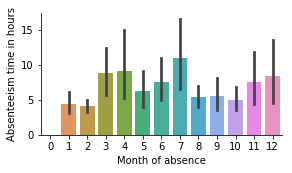

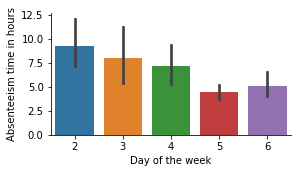

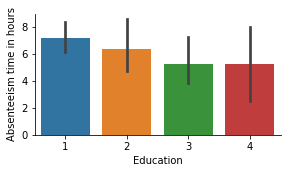

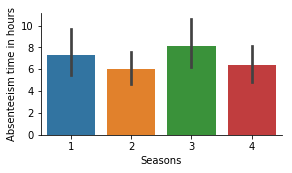

In [11]:
g1=sns.catplot(x="Month of absence",y="Absenteeism time in hours",kind='bar',data=df)
g1.fig.set_size_inches(4,2)
g2=sns.catplot(y="Absenteeism time in hours",x="Day of the week",kind='bar',data=df)
g2.fig.set_size_inches(4,2)
g3=sns.catplot(x="Education",y="Absenteeism time in hours",kind='bar',data=df)
g3.fig.set_size_inches(4,2)
g4=sns.catplot(x="Seasons",y="Absenteeism time in hours",kind='bar',data=df)
g4.fig.set_size_inches(4,2)

+ Absentee hours in month of June is high. Probably because of summer, as people mostly plan trips in summer
+ Employees are absent the most on Mondays and the least on Thursdays.
+ Employees who have high school education only, tend to remain more absent
+ Employees tend to remain more absent in winter. May be because of bad weather or health issue


+ From the plot below of Pet vs Absenteeism in hours, we can see that employees with 0,1 and 2 pets are comparitively more absent than employees have 4 and more than 4 pets

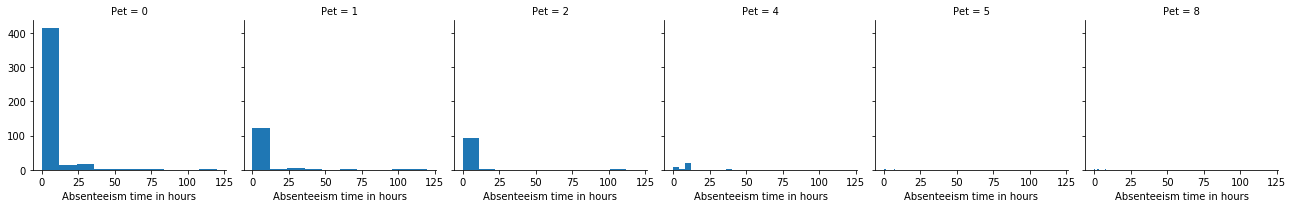

In [12]:
g5= sns.FacetGrid(data=df,col='Pet')
g5.map(plt.hist,'Absenteeism time in hours')

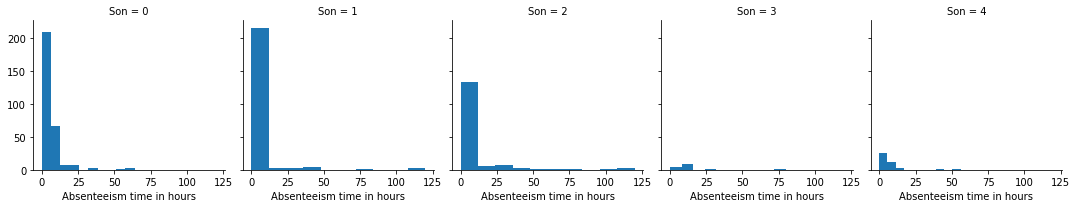

In [13]:
g6= sns.FacetGrid(data=df,col='Son')
g6.map(plt.hist,'Absenteeism time in hours')

Here all possible options for 'Son' column are shown in their correlation with absence time. 
We can see that, if you have 1 or 2 children, it is more likely to be absent at work. Probably, because if you have only one child and a mother presumably, no one can sit with child, apart from you and your spouse. But, if we look further, more chilren you have, less time you are absent. 
It means, that they can basically watch each other, and you dont need to stay home to take care of them.

## Eploratory data analysis

In [14]:
# To check count of missing values in dataset
Missing_value = pd.DataFrame(df.isnull().sum())
Missing_value = Missing_value.reset_index()
Missing_value = Missing_value.rename(columns = { 'index' : 'Features', 0 : 'Count'})
Missing_value

,Features,Count
0,ID,0
1,Reason for absence,0
2,Month of absence,0
3,Day of the week,0
4,Seasons,0
5,Transportation expense,0
6,Distance from Residence to Work,0
7,Service time,0
8,Age,0
9,Work load Average/day,0


+ No missing values found in dataset. 

In [15]:
# From the EDA categorising the variables in two category " Continuos" and "Categorical"
continuous_vars = ['Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Transportation expense',
       'Hit target', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']

categorical_vars = ['ID','Reason for absence','Month of absence','Day of the week',
                     'Seasons','Disciplinary failure', 'Education', 'Social drinker',
                     'Social smoker', 'Pet', 'Son']

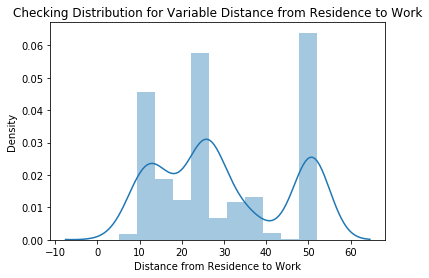

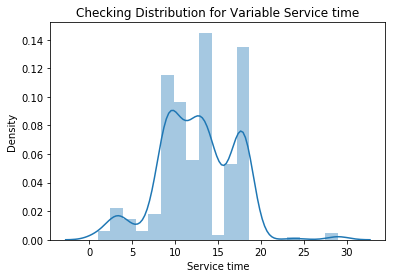

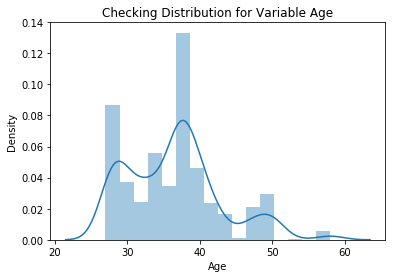

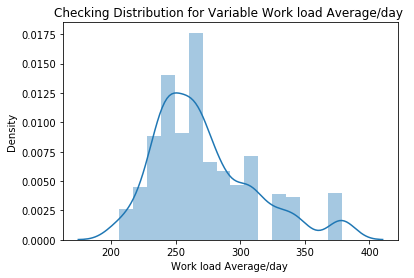

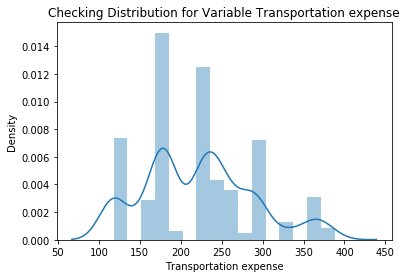

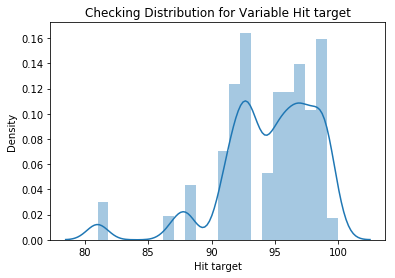

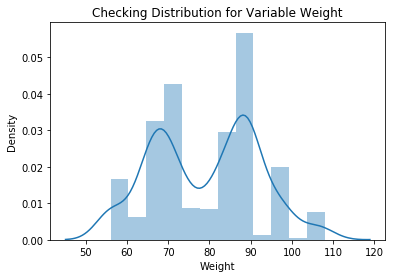

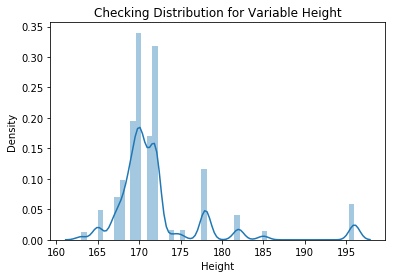

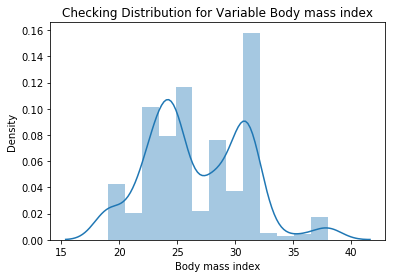

In [16]:
# Checking if there is any normally distributed variable in data
for i in continuous_vars:
    if i == 'Absenteeism time in hours':
        continue
    sns.distplot(df[i],bins = 'auto')
    plt.title("Checking Distribution for Variable "+str(i))
    plt.ylabel("Density")
    plt.show()

+ Clear observations can be made from these probability distributions that most of the variables are skewed. The skew in these distributions can be most likely due to presence of outliers and extreme values in the dataset.
+ So now our next step is to visualise outliers and remove them by using KNN impute function

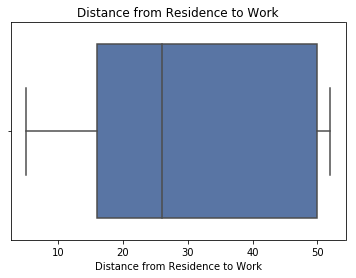

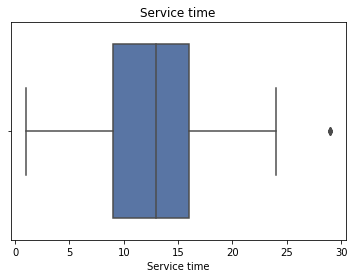

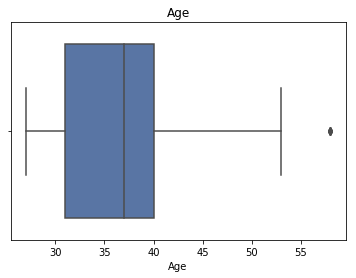

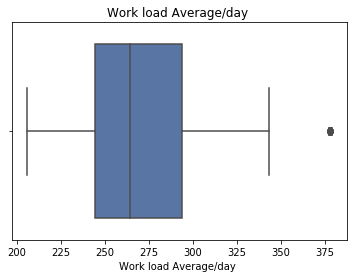

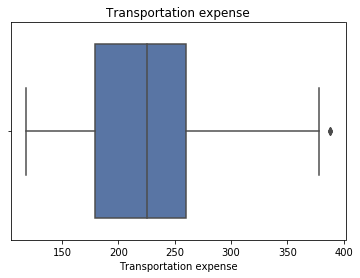

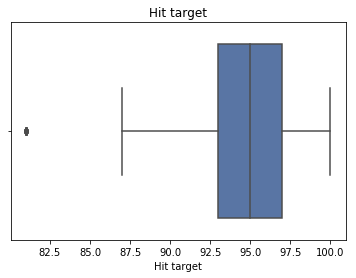

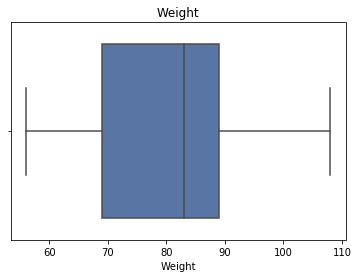

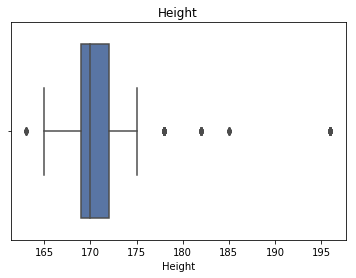

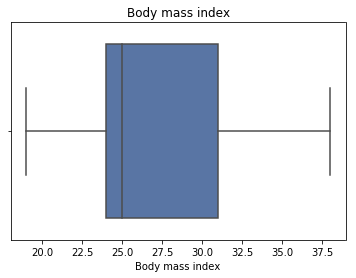

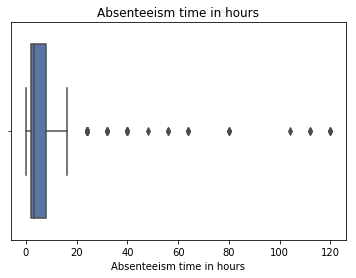

In [17]:
#Plot boxplot to visualize Outliers
for i in continuous_vars:
    plt.figure()
    plt.clf() 
    sns.boxplot(df[i],palette="deep")
    plt.title(i)
    plt.show()

+ The boxplot shows us that variables excluding Distance from residence to work, Weight and Body mass index, contain outliers.

+ So after visualizing outlier analysis we converted the outliers in NA values.

+ Then we used KNN imputation method to remove any outliers present in data


In [18]:
#Check for outliers using boxplots
for i in continuous_vars:
    # Getting 75 and 25 percentile of variable "i"
    q75, q25 = np.percentile(df[i], [75,25])
    
    # Calculating Interquartile range
    iqr = q75 - q25
    
    # Calculating upper extream and lower extream
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    
    # Replacing all the outliers value to NA
    df.loc[df[i]< minimum,i] = np.nan
    df.loc[df[i]> maximum,i] = np.nan


# Impute missing values with KNN
df = pd.DataFrame(KNN(k = 3).fit_transform(df), columns = df.columns)
# Checking if there is any missing value
df.isnull().sum()

Imputing row 1/740 with 0 missing, elapsed time: 0.186
Imputing row 101/740 with 1 missing, elapsed time: 0.197
Imputing row 201/740 with 0 missing, elapsed time: 0.198
Imputing row 301/740 with 0 missing, elapsed time: 0.202
Imputing row 401/740 with 0 missing, elapsed time: 0.203
Imputing row 501/740 with 0 missing, elapsed time: 0.205
Imputing row 601/740 with 0 missing, elapsed time: 0.207
Imputing row 701/740 with 0 missing, elapsed time: 0.208


ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

+ observed from above output, it is confirmed that no outliers are present in our data

In [19]:
df.to_csv(r'Absenteeism_part1.csv',index=False)
#The cleaned dataset is saved in csv file Absenteeism_part1.csv

In [20]:
df1= pd.read_csv("Absenteeism_part1.csv")

In [21]:
sorted(df1['Reason for absence'].astype(int).unique())
# To see if any value is missing, as we need to split this column in dummy variables for further analysis.
# Also splitting in dummy variables will shrink the data

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28]

+ From this we found out that reason number number 20 is missing.
 Reason number 20 is External causes of morbidity and mortality

### .get_dummies()

Now our next step is to create dummies for "Reason of Absence" column

In [22]:
reason_columns=pd.get_dummies(df1['Reason for absence'].astype(int))
reason_columns.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


+ Now to make sure that we dont have any missing values in dataset after creating dummies,we will check it out by implementing the code below.
+ This check ensures that and employee is absent by using one particular reason only.
+ In check column if we get 0, that means there is a missing value.
+ If we get 1 ,then there is single value for every reason
+ But if we get count for 2 and above which is not possible, then it implies that the reason is used more than once

In [23]:
# To check for missing or single value. If '1' is found then its a single value and if '0' is found then a value is missing
reason_columns['check']=reason_columns.sum(axis=1)
reason_columns

,0,1,2,3,4,5,6,7,8,9,...,19,21,22,23,24,25,26,27,28,check
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [24]:
# Purpose of 'check' column is finished. Hence, we need to drop that column
reason_columns=reason_columns.drop(['check'],axis=1)

In [25]:
reason_columns=pd.get_dummies(df1['Reason for absence'],drop_first=True)

+ We dropped the 'check' column because, we used to see we dont have any missing values in dataset after creating dummies.
+ Also, we are going to drop 'Reason of Absence' column to avoid multicollinearity.

In [26]:
reason_columns=reason_columns.astype(int)

In [27]:
df1=df1.drop(['Reason for absence'],axis=1)

### Grouping the column of  'Reasons for absence'
+ The categories of grouping diseases are as follows:-

Group 1 :Diseases from number 1-14 from dataset. They are categorised in group of serious diseases

Group 2:Diseases from number 15-17 are related to Pregnancy and problems in perinatal period

Group 3:Diseases in 18,19,20,21 are categorised as a posinning signs and other injuries

Group 4: Reasons from 22-last are considered as light reason for absence

+ This grouping was done to avoid confusions and to shrink data which is preferred analytically and also less data will be required to store the information

+ Also for doing quantitative analysis it is important to add numeric meaning to catgorical nominal values.

+ So keeping this in mind we converted reason of absence in dummy variables

+ Now, what is dummy variable?

 It is an explanatory binary variable that equals 1 if certain categorical effect is present and it equals 0 if that same effect is absent

 Also the fact about this data is that, it can be certain that an individual has been absent from work beause of only one particular reason.

In [28]:
reason_type_1=reason_columns.loc[:,1:14].max(axis=1)
reason_type_2=reason_columns.loc[:,15:17].max(axis=1)
reason_type_3=reason_columns.loc[:,18:21].max(axis=1)
reason_type_4=reason_columns.loc[:,22:].max(axis=1)
#0: none of the values on the given row were equal to 1
#1:somewhere among these 14 columns we have observed the number 1
#max helps to find this

+ Concatenate the column values to the original dataset and further reorder the column names according to convinience.

In [29]:
df1=pd.concat([df1,reason_type_1,reason_type_2,reason_type_3,reason_type_4],axis=1)

In [30]:
df1.columns.values

array(['ID', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours', 0, 1, 2, 3], dtype=object)

+ We renamed the splitted reason columns according to our convininece. Those columns appeared with labeling of 0,1,2,3. So, we renamed them to Reason_1,Reason_2,Reason_3,Reason_4

In [31]:
column_names=['ID','Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours',  'Reason_1', 'Reason_2', 'Reason_3','Reason_4' ]    

In [32]:
df1.columns=column_names

In [33]:
column_names_reordered=['ID','Reason_1', 'Reason_2', 'Reason_3','Reason_4','Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours' ]    

In [34]:
# Re-orederd column names to put Reason columns at front of dataset
df1=df1[column_names_reordered]

In [35]:
# we renamed the dataframe as df_reason_mod because we modified the reason column
df1_reason_mod=df1.copy()

+ Now further in our project, we will examine three more columns and see if they need any modifications.the columns are:-

### Education, Children and Pets

In [36]:
#This column appeared as float. So we converted it to int
df1_reason_mod[['Education']]=df1_reason_mod[['Education']].astype(int)

+ The above three columns represents categorical data

1.Children and pet tell us the nuber of children and pets precisely while,

2.The eduaction is feature which donot have numeric meaning. So we will convert the education column in dummy variables again this will shrink our data and will require less space to store

+ We transferred 'Education' column  in dummy variable using map method

#### NOTE:To remind, interpretation of 'Education' column is as below:

1 = high school degree

2= graduate

3= postgraduate

4= a master or a doctor degree

In [37]:
#df1_reason_mod['Education'].astype(int).value_counts()
df1_reason_mod['Education'].value_counts()

1    611
3     79
2     46
4      4
Name: Education, dtype: int64

Above execution shows that only 129 employees have higher education and 611 have eduacation of high school level

So after evaluating Education of total employees, we will split this column in two categories.

+ Category1 with employees who have high school degree

+ Category 2 with employees who have grad, post grad, masters and doctral degrees

In [38]:
#Use map method as we used before 
df1_reason_mod['Education']=df1_reason_mod['Education'].map({1:0,2:1,3:1,4:1})

In [39]:
df1_reason_mod['Education'].value_counts()

0    611
1    129
Name: Education, dtype: int64

So now only one column "Absenteeism column" is there on which we will not do any modification beacause,

1.Its interpretation is straightforward

2.Its modification is related to the application of advanced statistical techniques in python. It menas, if we want to dive deep in this mosule we will aslo have to implement it using SQL and other programming tools.

In [40]:
df_preprocessed=df1_reason_mod.copy()
df_preprocessed.head()

,ID,Reason_1,Reason_2,Reason_3,Reason_4,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11.0,0,0,0,1,7.0,3.0,1.0,289.0,36.0,...,0.0,0,2.0,1.0,0.0,1.0,90.0,172.000000,30.0,4.0
1,36.0,0,0,0,0,7.0,3.0,1.0,118.0,13.0,...,1.0,0,1.0,1.0,0.0,0.0,98.0,171.999997,31.0,0.0
2,3.0,0,0,0,1,7.0,4.0,1.0,179.0,51.0,...,0.0,0,0.0,1.0,0.0,0.0,89.0,170.000000,31.0,2.0
3,7.0,1,0,0,0,7.0,5.0,1.0,279.0,5.0,...,0.0,0,2.0,1.0,1.0,0.0,68.0,168.000000,24.0,4.0
4,11.0,0,0,0,1,7.0,5.0,1.0,289.0,36.0,...,0.0,0,2.0,1.0,0.0,1.0,90.0,172.000000,30.0,2.0


In [41]:
# As the preprocessing is completed on dataset we save d the data to df_preprocessed.csv
df_preprocessed.to_csv(r'df_preprocessed.csv',index=False)